In [14]:
import torch
from torch.utils.data import DataLoader
from models import GeneratorNetwork, DiscriminatorNetwork
from torchvision.utils import make_grid
from torchvision import transforms
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt

In [15]:
image_shape = (3, 64, 64)
transform = transforms.Compose([
    transforms.Resize(image_shape[1:]),
    transforms.CenterCrop(image_shape[1:]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataroot = "./data/nine_257/"
batch_size = 64
num_workers = 4
dataset = ImageFolder(dataroot, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

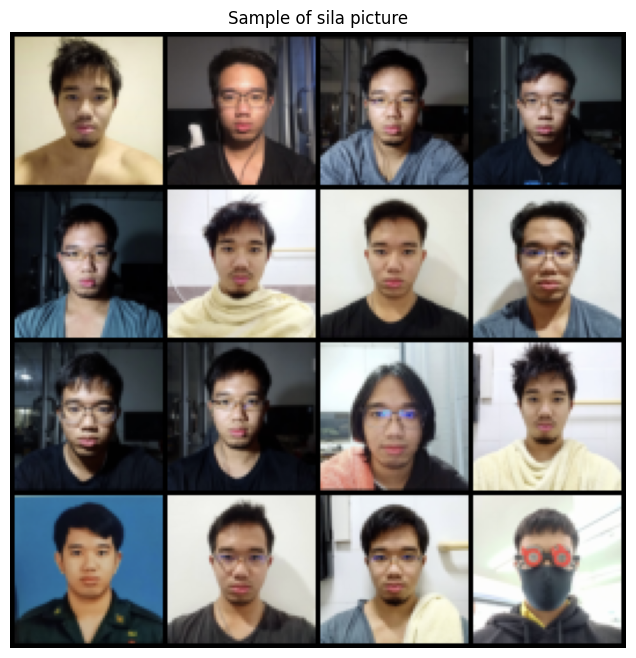

In [143]:
real_batch = next(iter(dataloader))
images_plot_nine = make_grid(real_batch[0][:16], normalize=True, nrow=4)
plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(images_plot_nine, (1, 2, 0)))
plt.axis("off")
plt.title("Sample of sila picture")
plt.show()

In [130]:
generator2_state_dict = "./checkpoint/generator_sila_1000.pt"
discriminator2_state_dict = "./checkpoint/discriminator_sila_1000.pt"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
generator2 = GeneratorNetwork().to(device)
discriminator2 = DiscriminatorNetwork().to(device)
generator2.load_state_dict(torch.load(generator2_state_dict))
discriminator2.load_state_dict(torch.load(discriminator2_state_dict))
criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator2.parameters(), lr=0.002, betas=(0.5, 0.999), eps=10e-8)

In [131]:
# Freeze discriminator
len_main_param = len(list(discriminator2.parameters()))
for i, param in enumerate(discriminator2.parameters(), 0):
    if i > int(0.3 * len_main_param):
        break
    else:
        param.requires_grad = True
    
disc_opt = torch.optim.Adam(discriminator2.parameters(), lr=0.002, betas=(0.5, 0.999), eps=10e-8)

<Figure size 800x800 with 0 Axes>

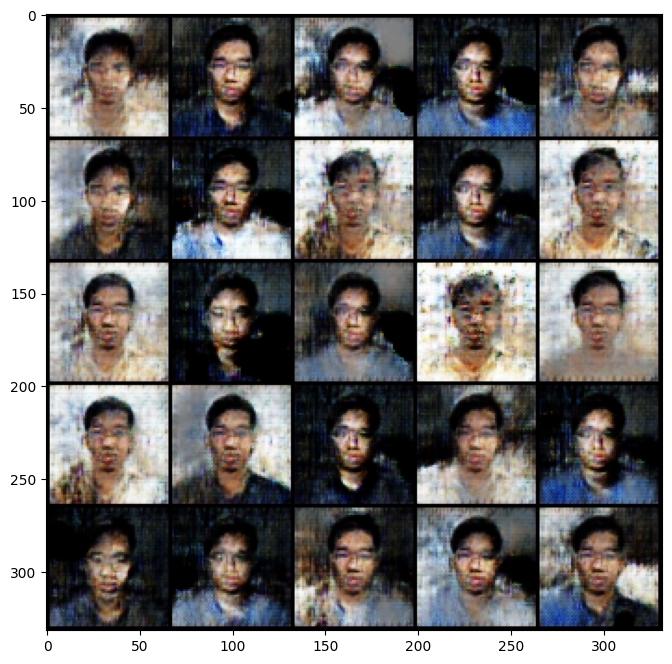

In [151]:
noise = torch.randn(size=(25, 100, 1, 1)).to(device)
with torch.no_grad():
    images = generator2(noise)
plt.figure(figsize=(8, 8))
images_plot = make_grid(images.cpu(), padding=2, normalize=True, nrow=5)
plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(images_plot, (1, 2, 0)))

In [ ]:
# Trainging loop
from training import training
num_epochs = 500
G_losses = []
D_losses = []
img_list = []
G_losses, D_losses, img_list = training(generator2, discriminator2, device, num_epochs, dataloader, criterion, gen_opt, disc_opt)

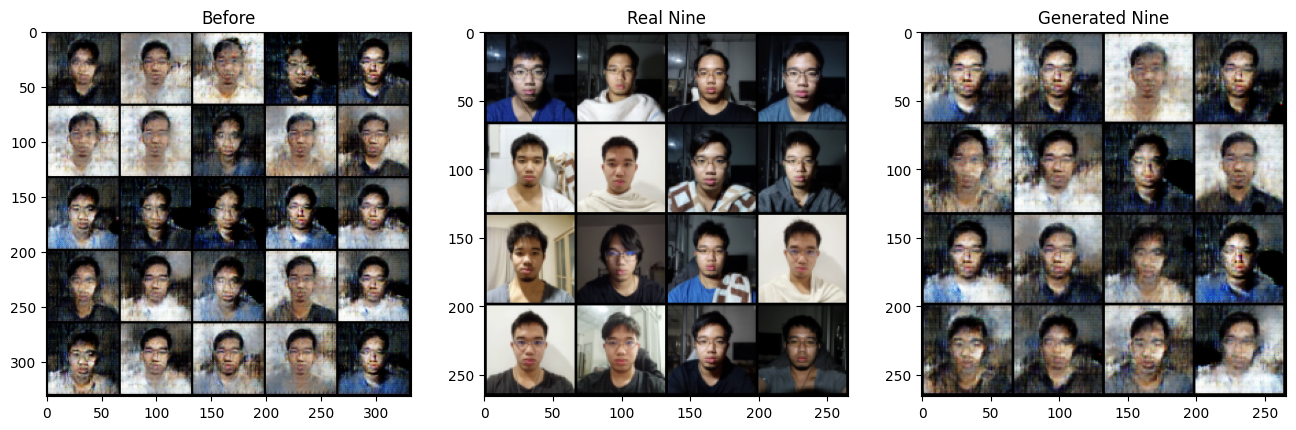

In [141]:
noise = torch.randn(size=(16, 100, 1, 1)).to(device)
images = generator2(noise)
grid = make_grid(images, normalize=True, nrow=4).cpu()
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title("Before")
plt.imshow(np.transpose(images_plot, (1, 2, 0)))
plt.subplot(1, 3, 2)
plt.title("Real Nine")
plt.imshow(np.transpose(images_plot_nine, (1, 2, 0)))
plt.subplot(1, 3, 3)
plt.title("Generated Nine")
plt.imshow(np.transpose(grid, (1, 2, 0)))
